# Exploratory Data Analysis

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [52]:
data = pd.read_csv('corruption.csv')
print('Data types: \n' + str(data.dtypes))
print('Data shape:\n'+str(data.shape))
print(data.head())
print('Missing values: \n' + str(data.isnull().sum()))

Data types: 
Country             object
Corruption index     int64
Ø Annual income     object
dtype: object
Data shape:
(113, 3)
       Country  Corruption index Ø Annual income
0      Denmark                10        73,200 $
1      Finland                13        54,360 $
2  New Zealand                13        48,460 $
3       Norway                16        95,510 $
4    Singapore                17        67,200 $
Missing values: 
Country             0
Corruption index    0
Ø Annual income     1
dtype: int64


In [53]:
data.rename(columns={'Ø Annual income':'Annual income'}, inplace=True)

In [54]:
data['Annual income']

0      73,200 $
1      54,360 $
2      48,460 $
3      95,510 $
4      67,200 $
         ...   
108       670 $
109    13,080 $
110       460 $
111       760 $
112       470 $
Name: Annual income, Length: 113, dtype: object

In [57]:
data['Annual income'] = data['Annual income'].str[:-1]
data['Annual income'] = data['Annual income'].str.replace(',','')
data['Annual income']

0      73200
1      54360
2      48460
3      95510
4      67200
       ...  
108      670
109    13080
110      460
111      760
112      470
Name: Annual income, Length: 113, dtype: object

In [58]:
data['Annual income'] = pd.to_numeric(data['Annual income'])
data['Annual income']

0      73200.0
1      54360.0
2      48460.0
3      95510.0
4      67200.0
        ...   
108      670.0
109    13080.0
110      460.0
111      760.0
112      470.0
Name: Annual income, Length: 113, dtype: float64

In [62]:
data.drop_duplicates(subset=['Country'], inplace=True)
data.fillna(data.mean(),inplace=True)
data.isnull().sum()

C:\Users\Alser\AppData\Local\Temp\ipykernel_15228\3383555692.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


Country             0
Corruption index    0
Annual income       0
dtype: int64

In [70]:
print('Maximum: \n' + str(data.max()))
print('Minimum: \n'+ str(data.min()))
print('Description of data: \n' + str(data.describe()))

Maximum: 
Country             Zimbabwe
Corruption index          88
Annual income        95510.0
dtype: object
Minimum: 
Country             Afghanistan
Corruption index             10
Annual income             240.0
dtype: object
Description of data: 
       Corruption index  Annual income
count        113.000000     113.000000
mean          59.761062   17677.767857
std           21.825720   25042.557125
min           10.000000     240.000000
25%           44.000000    1580.000000
50%           68.000000    4270.000000
75%           76.000000   25800.000000
max           88.000000   95510.000000


In [74]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

C:\Users\Alser\AppData\Local\Temp\ipykernel_15228\1372027334.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\Alser\AppData\Local\Temp\ipykernel_15228\1372027334.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


Corruption index       32.0
Annual income       24220.0
dtype: float64

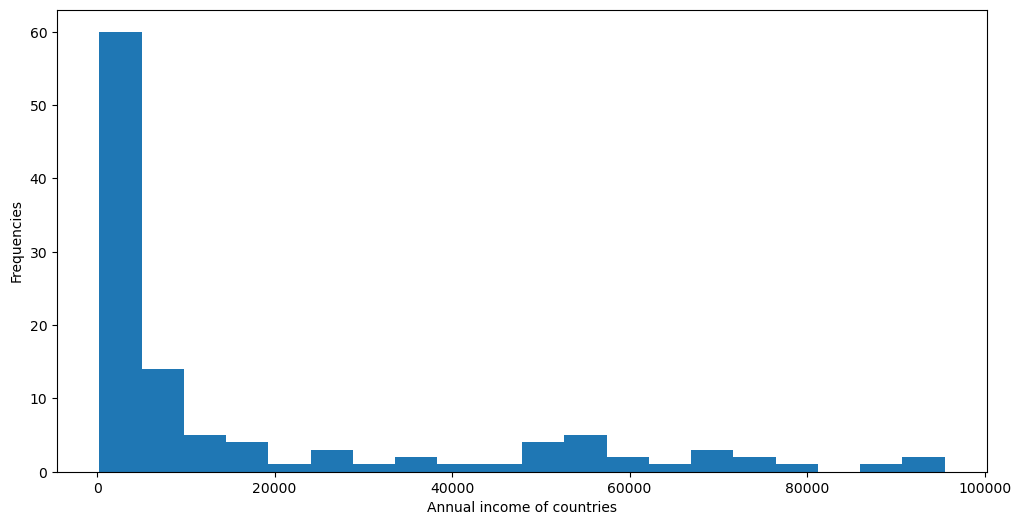

In [83]:
plt.figure(figsize=(12,6))
plt.hist(data['Annual income'], bins=20)
plt.xlabel('Annual income of countries')
plt.ylabel('Frequencies')
plt.show()

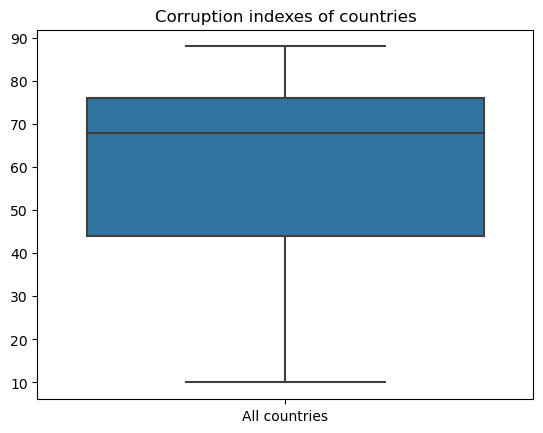

In [99]:
sns.boxplot(data['Corruption index'])
plt.xticks(ticks=[0], labels=['All countries'])
plt.title('Corruption indexes of countries')
plt.show()

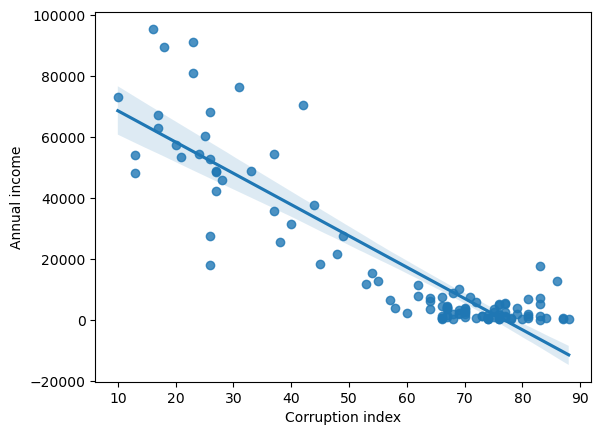

In [108]:
sns.regplot(x = data['Corruption index'], y = data['Annual income'])
plt.show()

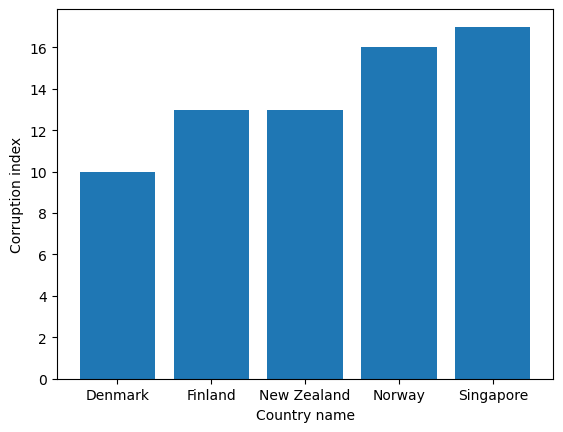

In [118]:
plt.bar(data['Country'][:5],data['Corruption index'][:5])
plt.xlabel('Country name')
plt.ylabel('Corruption index')
plt.show()

In [124]:
less_cor = data[data['Corruption index']<=50]['Annual income']
more_cor = data[data['Corruption index']>50]['Annual income']
t_statistics, p_value = stats.ttest_ind(less_cor, more_cor)
alpha = 0.05

print('T statistics: ' + str(t_statistics))
print('P value: ' + str(p_value))

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")
    

T statistics: 20.200461609222096
P value: 5.6288715153877223e-39
Reject the null hypothesis: There is a significant difference between the means.


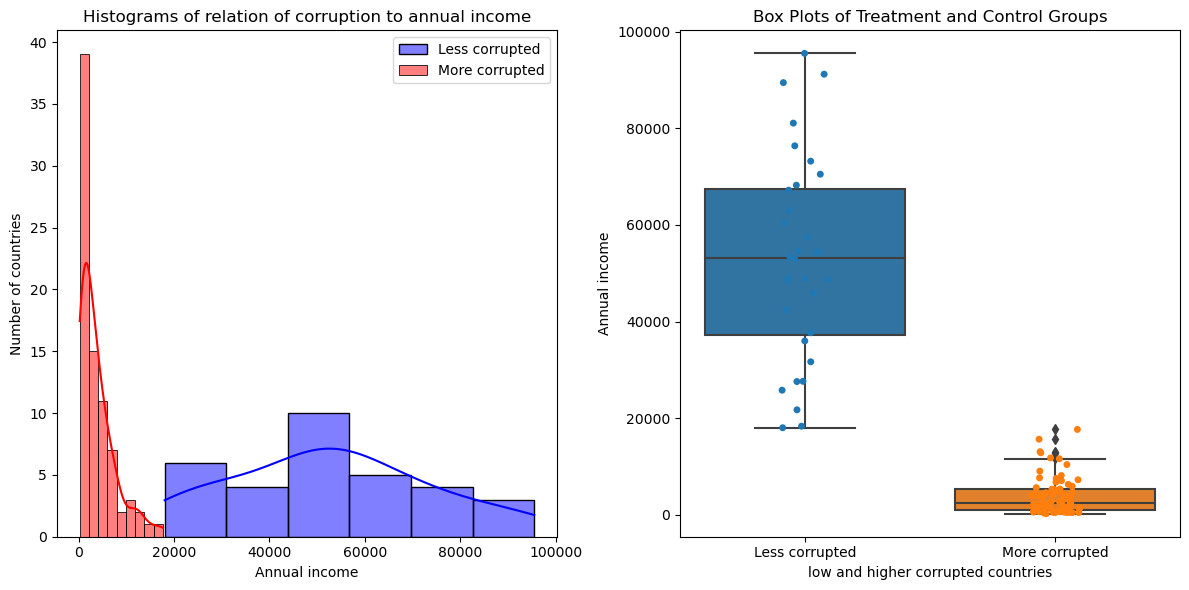

In [138]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

sns.histplot(less_cor, color='blue', label='Less corrupted', kde=True)
sns.histplot(more_cor, color='red', label='More corrupted', kde=True)

plt.xlabel('Annual income')
plt.ylabel('Number of countries')
plt.title('Histograms of relation of corruption to annual income')
plt.legend()

# Create a figure with subplots for box plots
plt.subplot(1, 2, 2)
data1 = pd.DataFrame({'Less corrupted': less_cor, 'More corrupted': more_cor})
# Plot box plots for the two groups
sns.boxplot(data1)

plt.xlabel('low and higher corrupted countries')
plt.ylabel('Annual income')
plt.title('Box Plots of Treatment and Control Groups')

# Overlay the means on the box plots
sns.stripplot(data1)

plt.tight_layout()
plt.show()